In [128]:
# !pip install pandas
# !pip install tensorflow
# !pip install seaborn
# !pip install pydot
from tensorflow.keras.layers import Normalization , Dense , InputLayer
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.losses import MeanSquaredError,Huber,MeanAbsoluteError
from tensorflow.keras.optimizers import Adam


# DATA PREPROCESSING

In [129]:
import pandas as pd
import tensorflow as tf
import seaborn as sb

file = pd.read_csv("train.csv",delimiter=",")
print(file.shape)
file.head(5)



(1000, 12)


,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [130]:
tensor_data = tf.constant(file)
tensor_data = tf.cast(tensor_data,tf.float32)
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


# Shuffling

In [131]:
tensor_data = tf.random.shuffle(tensor_data)
tensor_data[:5]

<tf.Tensor: shape=(5, 12), dtype=float32, numpy=
array([[6.170000e+02, 6.716300e+05, 7.073610e+05, 2.000000e+00,
        7.024600e+04, 4.000000e+00, 2.000000e+00, 1.300000e+01,
        1.870000e+02, 1.180000e+02, 1.040000e+02, 4.093125e+05],
       [8.850000e+02, 5.421700e+05, 7.689010e+05, 2.000000e+00,
        1.330050e+05, 3.000000e+00, 9.000000e+00, 1.000000e+01,
        1.890000e+02, 8.300000e+01, 1.000000e+02, 1.533815e+05],
       [7.810000e+02, 6.635290e+05, 7.909440e+05, 5.000000e+00,
        1.493190e+05, 5.000000e+00, 6.000000e+00, 9.000000e+00,
        1.490000e+02, 6.700000e+01, 7.600000e+01, 1.340350e+05],
       [9.460000e+02, 5.084830e+05, 7.886510e+05, 3.000000e+00,
        1.016570e+05, 3.000000e+00, 4.000000e+00, 1.200000e+01,
        1.780000e+02, 7.100000e+01, 1.240000e+02, 2.427095e+05],
       [8.110000e+02, 6.608420e+05, 8.262370e+05, 6.000000e+00,
        1.257350e+05, 2.000000e+00, 2.000000e+00, 1.000000e+01,
        1.950000e+02, 9.300000e+01, 1.130000e+02, 2

# Input & Output

In [132]:
X = tensor_data[:,3:-1]
print(X[:5])
print(X.shape)

tf.Tensor(
[[2.00000e+00 7.02460e+04 4.00000e+00 2.00000e+00 1.30000e+01 1.87000e+02
  1.18000e+02 1.04000e+02]
 [2.00000e+00 1.33005e+05 3.00000e+00 9.00000e+00 1.00000e+01 1.89000e+02
  8.30000e+01 1.00000e+02]
 [5.00000e+00 1.49319e+05 5.00000e+00 6.00000e+00 9.00000e+00 1.49000e+02
  6.70000e+01 7.60000e+01]
 [3.00000e+00 1.01657e+05 3.00000e+00 4.00000e+00 1.20000e+01 1.78000e+02
  7.10000e+01 1.24000e+02]
 [6.00000e+00 1.25735e+05 2.00000e+00 2.00000e+00 1.00000e+01 1.95000e+02
  9.30000e+01 1.13000e+02]], shape=(5, 8), dtype=float32)
(1000, 8)


In [133]:
y = tensor_data[:,-1]
y = tf.expand_dims(y,axis=-1)
print(y[:5])
print(y.shape)

tf.Tensor(
[[409312.5]
 [153381.5]
 [134035. ]
 [242709.5]
 [236994. ]], shape=(5, 1), dtype=float32)
(1000, 1)


# TRAINING

In [134]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)
print(DATASET_SIZE)


1000


In [135]:
X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train= y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(X_train.shape)
print(y_train.shape)
print(y_train)

(800, 8)
(800, 1)
tf.Tensor(
[[409312.5]
 [153381.5]
 [134035. ]
 [242709.5]
 [236994. ]
 [331819.5]
 [299655. ]
 [460019.5]
 [381846.5]
 [469956. ]
 [200794.5]
 [468666. ]
 [274172. ]
 [545171. ]
 [186308. ]
 [314576.5]
 [306982.5]
 [140061.5]
 [483708.5]
 [179711.5]
 [191566. ]
 [212553.5]
 [275385. ]
 [200408.5]
 [232526.5]
 [210661.5]
 [503606.5]
 [447337. ]
 [164649.5]
 [308376.5]
 [438032.5]
 [415493. ]
 [298023. ]
 [393351. ]
 [172758.5]
 [369571.5]
 [367122. ]
 [315866.5]
 [316827.5]
 [388376. ]
 [385196. ]
 [466398. ]
 [502519. ]
 [455824.5]
 [413066. ]
 [126791.5]
 [526502.5]
 [227669. ]
 [445538. ]
 [493806.5]
 [240353.5]
 [352284.5]
 [364155.5]
 [321363. ]
 [158250.5]
 [295021. ]
 [305463. ]
 [198892. ]
 [136079. ]
 [385248.5]
 [146787. ]
 [180368.5]
 [398513.5]
 [475273.5]
 [268200.5]
 [377575. ]
 [273728. ]
 [399055.5]
 [353237. ]
 [ 78924.5]
 [245796. ]
 [500164. ]
 [496671. ]
 [425960. ]
 [177748.5]
 [349780. ]
 [515722.5]
 [264084.5]
 [262090. ]
 [328863. ]
 [209639. ]

In [136]:
X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
print(X_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


In [137]:
X_test = X[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
print(X_test.shape)
print(y_test.shape)

(100, 8)
(100, 1)


In [138]:
# Train Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)


# Validation Dataset
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

# Test Dataset
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)


In [139]:
for k,j in train_dataset:
    print(k,j)

tf.Tensor(
[[6.00000e+00 1.25735e+05 2.00000e+00 2.00000e+00 1.00000e+01 1.95000e+02
  9.30000e+01 1.13000e+02]
 [3.00000e+00 7.44890e+04 1.00000e+00 9.00000e+00 8.00000e+00 1.79000e+02
  9.60000e+01 1.36000e+02]
 [5.00000e+00 1.49319e+05 5.00000e+00 6.00000e+00 9.00000e+00 1.49000e+02
  6.70000e+01 7.60000e+01]
 [2.00000e+00 1.33005e+05 3.00000e+00 9.00000e+00 1.00000e+01 1.89000e+02
  8.30000e+01 1.00000e+02]
 [2.00000e+00 1.22105e+05 5.00000e+00 3.00000e+00 1.30000e+01 1.47000e+02
  1.14000e+02 8.00000e+01]
 [4.00000e+00 7.87140e+04 1.00000e+00 8.00000e+00 1.10000e+01 1.55000e+02
  9.70000e+01 1.14000e+02]
 [7.00000e+00 7.05640e+04 1.00000e+00 1.00000e+01 1.50000e+01 1.76000e+02
  7.40000e+01 1.19000e+02]
 [2.00000e+00 8.75060e+04 5.00000e+00 6.00000e+00 1.00000e+01 1.85000e+02
  9.50000e+01 1.10000e+02]
 [5.00000e+00 1.17260e+05 2.00000e+00 5.00000e+00 1.00000e+01 1.55000e+02
  1.18000e+02 1.26000e+02]
 [4.00000e+00 5.69910e+04 1.00000e+00 8.00000e+00 1.40000e+01 1.51000e+02
  6.60

In [140]:
for k,j in val_dataset:
    print(k,j)

tf.Tensor(
[[2.00000e+00 1.01958e+05 2.00000e+00 7.00000e+00 8.00000e+00 1.35000e+02
  5.80000e+01 8.40000e+01]
 [3.00000e+00 8.17860e+04 1.00000e+00 1.00000e+00 1.30000e+01 1.38000e+02
  9.10000e+01 6.90000e+01]
 [7.00000e+00 6.75200e+04 2.00000e+00 9.00000e+00 9.00000e+00 1.41000e+02
  1.03000e+02 7.50000e+01]
 [5.00000e+00 6.34030e+04 1.00000e+00 1.00000e+01 1.00000e+01 1.74000e+02
  7.40000e+01 1.25000e+02]
 [7.00000e+00 1.30523e+05 5.00000e+00 5.00000e+00 1.00000e+01 1.87000e+02
  7.50000e+01 1.29000e+02]
 [5.00000e+00 1.43410e+05 1.00000e+00 7.00000e+00 9.00000e+00 1.79000e+02
  8.00000e+01 1.20000e+02]
 [5.00000e+00 5.06480e+04 3.00000e+00 4.00000e+00 1.10000e+01 1.40000e+02
  1.12000e+02 7.80000e+01]
 [2.00000e+00 1.38370e+05 2.00000e+00 7.00000e+00 1.40000e+01 1.69000e+02
  6.00000e+01 1.08000e+02]
 [3.00000e+00 1.14156e+05 1.00000e+00 2.00000e+00 1.10000e+01 1.82000e+02
  9.50000e+01 9.50000e+01]
 [2.00000e+00 9.88800e+04 2.00000e+00 3.00000e+00 1.10000e+01 1.95000e+02
  6.00

In [141]:
for k,j in train_dataset:
    print(k,j)

tf.Tensor(
[[4.00000e+00 7.87140e+04 1.00000e+00 8.00000e+00 1.10000e+01 1.55000e+02
  9.70000e+01 1.14000e+02]
 [3.00000e+00 1.01657e+05 3.00000e+00 4.00000e+00 1.20000e+01 1.78000e+02
  7.10000e+01 1.24000e+02]
 [4.00000e+00 5.69910e+04 1.00000e+00 8.00000e+00 1.40000e+01 1.51000e+02
  6.60000e+01 9.70000e+01]
 [5.00000e+00 1.49319e+05 5.00000e+00 6.00000e+00 9.00000e+00 1.49000e+02
  6.70000e+01 7.60000e+01]
 [2.00000e+00 1.33005e+05 3.00000e+00 9.00000e+00 1.00000e+01 1.89000e+02
  8.30000e+01 1.00000e+02]
 [2.00000e+00 7.02460e+04 4.00000e+00 2.00000e+00 1.30000e+01 1.87000e+02
  1.18000e+02 1.04000e+02]
 [4.00000e+00 1.31374e+05 5.00000e+00 2.00000e+00 9.00000e+00 1.81000e+02
  9.10000e+01 6.80000e+01]
 [7.00000e+00 6.03450e+04 3.00000e+00 9.00000e+00 1.20000e+01 1.83000e+02
  9.40000e+01 9.90000e+01]
 [6.00000e+00 9.70440e+04 3.00000e+00 9.00000e+00 1.10000e+01 1.77000e+02
  8.30000e+01 8.10000e+01]
 [3.00000e+00 7.44890e+04 1.00000e+00 9.00000e+00 8.00000e+00 1.79000e+02
  9.60


# Normalization

In [142]:
Normalizer = Normalization()
Normalizer.adapt(X_train)
Normalizer(X[:5])
# print(Normalizer(X[:5]))
# print(X[:5])

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[-1.5237827 , -1.0085468 ,  0.719906  , -1.3142933 ,  0.59389806,
         1.0242012 ,  1.6261266 ,  0.02898744],
       [-1.5237827 ,  1.1431403 ,  0.0044714 ,  1.1882713 , -0.7469822 ,
         1.1273627 , -0.0749063 , -0.16031732],
       [ 0.23273917,  1.7024645 ,  1.4353406 ,  0.11574362, -1.1939423 ,
        -0.93586934, -0.85252136, -1.2961459 ],
       [-0.9382754 ,  0.06837672,  0.0044714 , -0.5992748 ,  0.14693798,
         0.5599739 , -0.6581176 ,  0.97551125],
       [ 0.8182465 ,  0.893889  , -0.7109632 , -1.3142933 , -0.7469822 ,
         1.4368476 ,  0.4111031 ,  0.45492315]], dtype=float32)>

# Model 

In [143]:
model = tf.keras.Sequential([
    InputLayer(input_shape = (8,)),
    Normalizer,
    Dense(128,activation='relu'),
    Dense(128,activation='relu'),
    Dense(128,activation='relu'),
    Dense(1),
])
model.summary()
model.build()

u:\Projects\Car price prediction\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_4 (Normalization) │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,322 (134.07 KB)

 Trainable params: 34,305 (134.00 KB)

 Non-trainable params: 17 (72.00 B)

In [162]:
model.compile(optimizer=Adam(
    learning_rate=1.0
    ),
              loss=MeanAbsoluteError(),
              metrics=[RootMeanSquaredError()])


# Training

In [163]:
history = model.fit(train_dataset,validation_data=val_dataset, epochs=100,verbose=1)

print(history.history.keys())

 
# # model.compile(optimizer='adam', loss='your_loss_function', metrics=['accuracy'])


Epoch 1/100


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 62968.1719 - root_mean_squared_error: 79371.6641 - val_loss: 44949.3281 - val_root_mean_squared_error: 56114.0430
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 36247.6328 - root_mean_squared_error: 46100.0742 - val_loss: 45522.5508 - val_root_mean_squared_error: 57581.0312
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 32259.0977 - root_mean_squared_error: 41737.8516 - val_loss: 40096.4062 - val_root_mean_squared_error: 49640.6016
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 29509.0391 - root_mean_squared_error: 38637.9297 - val_loss: 42438.4336 - val_root_mean_squared_error: 54022.6719
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 29802.7109 - root_mean_squared_error: 38701.5391 - val_loss: 41365.4414 - val_root_mean_squared_error: 52771.4922
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 34478.0078 - root_mean_squared_error: 44364.4609 - val_loss: 50695.9883 - val_root_m

In [147]:
print(history.history.keys())

dict_keys(['custom_accuracy', 'loss', 'root_mean_squared_error', 'val_custom_accuracy', 'val_loss', 'val_root_mean_squared_error'])


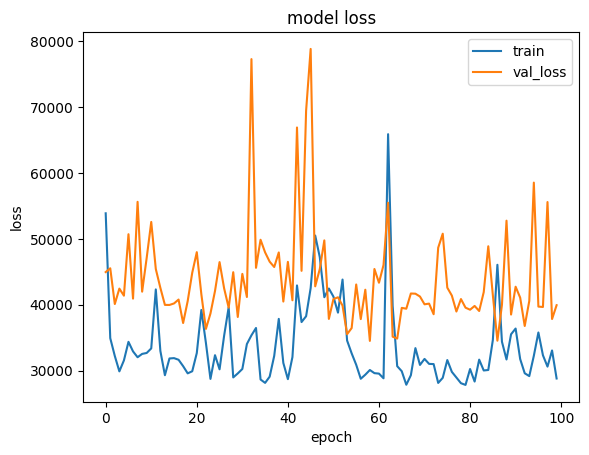

In [165]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val_loss'])
plt.show()

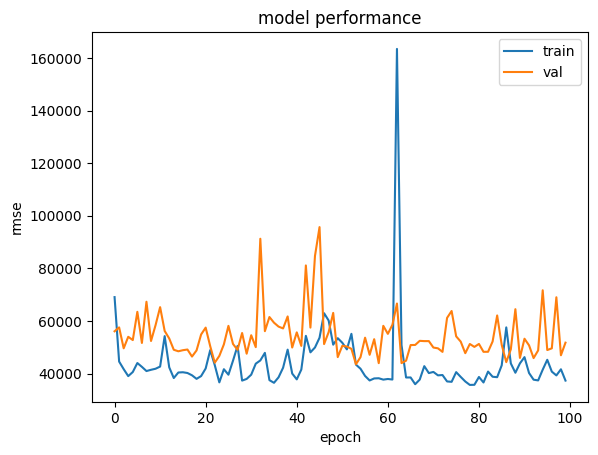

In [166]:
import matplotlib.pyplot as plt
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])

plt.title('model performance')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train','val'])
plt.show()   

In [150]:
history.history

{'custom_accuracy': [0.032499998807907104,
  0.2162500023841858,
  0.32875001430511475,
  0.33000001311302185,
  0.35874998569488525,
  0.42750000953674316,
  0.46000000834465027,
  0.39750000834465027,
  0.42250001430511475,
  0.3675000071525574,
  0.4312500059604645,
  0.32749998569488525,
  0.33000001311302185,
  0.4449999928474426,
  0.4399999976158142,
  0.4099999964237213,
  0.47874999046325684,
  0.48249998688697815,
  0.4337500035762787,
  0.45875000953674316,
  0.41874998807907104,
  0.4312500059604645,
  0.4412499964237213,
  0.4449999928474426,
  0.4012500047683716,
  0.46875,
  0.48374998569488525,
  0.42875000834465027,
  0.3799999952316284,
  0.5137500166893005,
  0.4675000011920929,
  0.4012500047683716,
  0.4762499928474426,
  0.5099999904632568,
  0.5325000286102295,
  0.47749999165534973,
  0.49125000834465027,
  0.3787499964237213,
  0.4412499964237213,
  0.3987500071525574,
  0.5325000286102295,
  0.4699999988079071,
  0.512499988079071,
  0.5137500166893005,
  0.49

In [167]:
model.evaluate(X_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 51351.5820 - root_mean_squared_error: 61642.8086


[51419.78515625, 62488.32421875]

In [168]:
model.predict(tf.expand_dims(X_test[0], axis = 0))
# X_test.
# X_test[0].shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


array([[149769.27]], dtype=float32)

In [153]:
y_test[0]


<tf.Tensor: shape=(1,), dtype=float32, numpy=array([123719.5], dtype=float32)>

In [169]:
y_true = list(y_test[:,0].numpy())
y_pred = list(model.predict(X_test)[:,0])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  


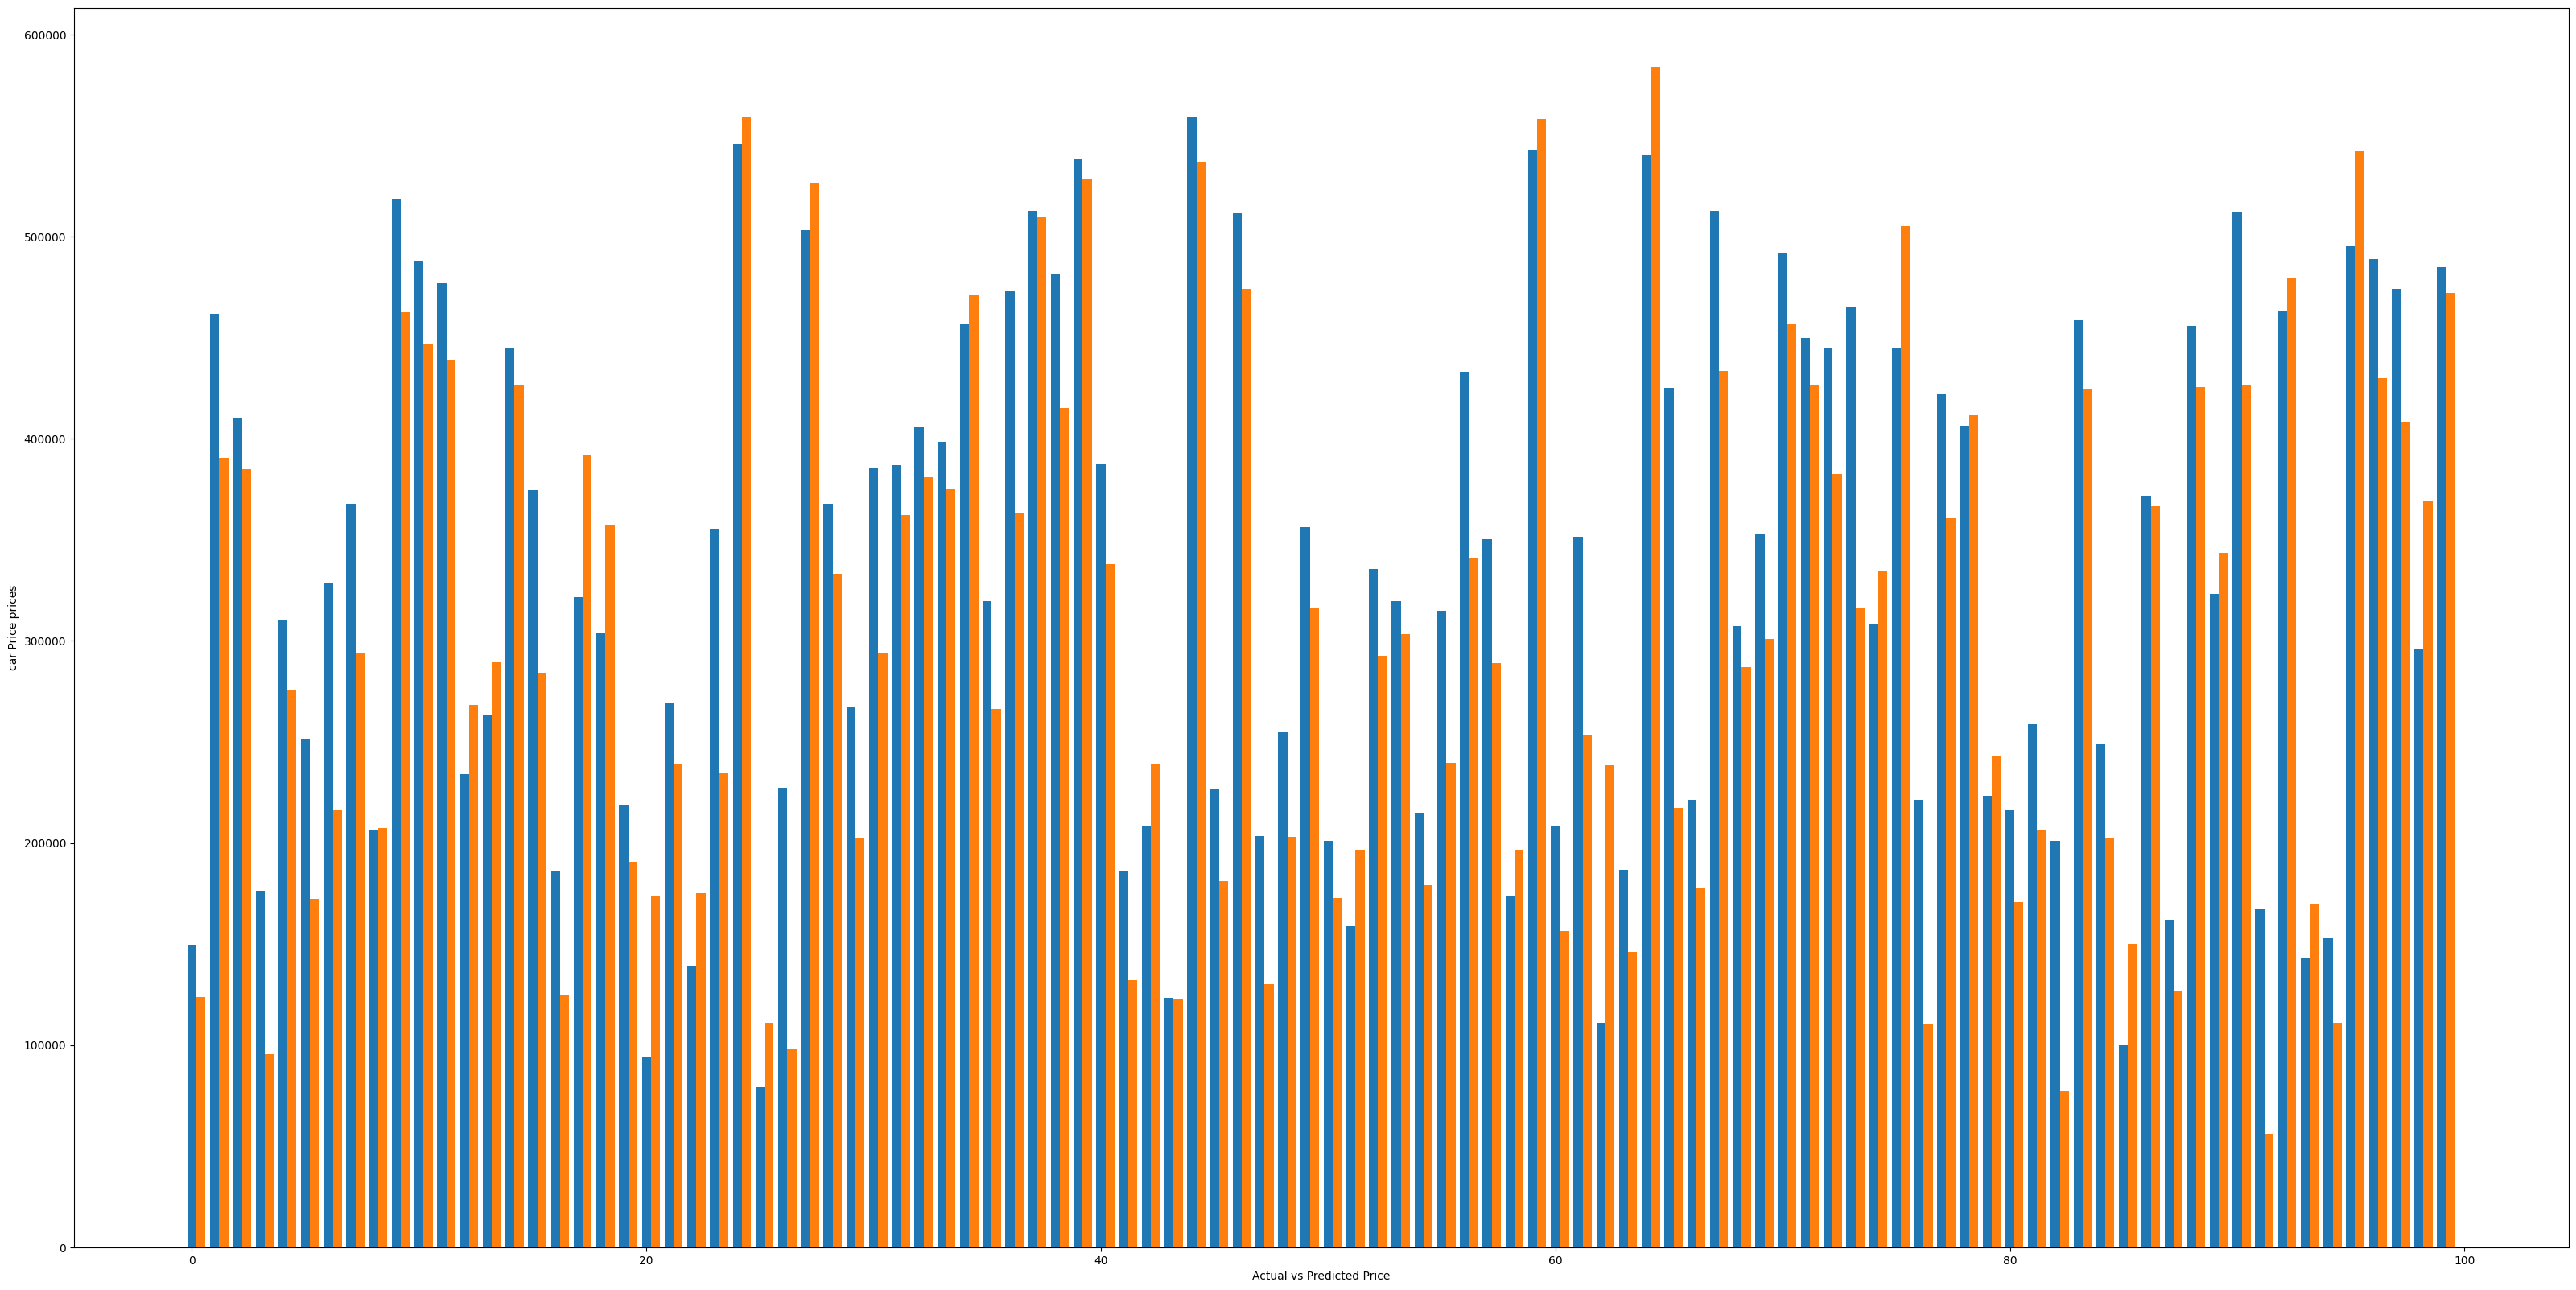

In [172]:
import numpy as np
ind = np.arange(100)
plt.figure(figsize=(40,20))
width = 0.4

plt.bar(ind , y_pred,width , label='Pred car price')
plt.bar(ind + width, y_true,width , label='Actual car price')

plt.xlabel('Actual vs Predicted Price')
plt.ylabel('car Price prices')
plt.show()